In [4]:
from datetime import datetime as dt
import pandas as pd
import pandas_ta as ta
import numpy as np
import torch
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/Users/stevenwinatamulia/Documents/skripsi-git//Documents/skripsi/ETHUSDT-4h-2020-2024.csv",delimiter=';')

In [6]:
#change timestamp into datetime
def timestamp_to_datetime(timestamp:list)->list:
    datetime = []
    for i in timestamp:
        datetime.append(dt.fromtimestamp(int(i)/1000))
    return datetime

df['open_time'] = timestamp_to_datetime(df['open_time'])
df['close_time'] = timestamp_to_datetime(df['close_time'])
df.index=df['open_time']

# feature engineering

In [7]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume',
       'ignore'],
      dtype='object')

In [8]:
df['SMA_50'] = ta.sma(df['close'], 50)
df['RSI_14'] = ta.rsi(df['close'], 14)
df['RSI_21'] = ta.rsi(df['close'],21)
df['EMA_20'] = ta.ema(df['close'], 20)
df['EMA_34'] = ta.ema(df['close'], 34)
df = df.join(ta.bbands(df['close'], length=20, std=2))
df = df.join(ta.macd(df['close'], fast=12, slow=26, signal=9))
#df['BB_upper'], df['BB_middle'], df['BB_lower'] = ta.bbands(df['close'], length=20, std=2)
#df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.macd(df['close'], fast=12, slow=26, signal=9)

In [9]:
df['SMA_50'] = ta.sma(df['close'], 50)
df['RSI_14'] = ta.rsi(df['close'], 14)
df['RSI_21'] = ta.rsi(df['close'],21)
df['EMA_20'] = ta.ema(df['close'], 20)
df['EMA_34'] = ta.ema(df['close'], 34)
#df['BB_upper'], df['BB_middle'], df['BB_lower'] = ta.bbands(df['close'], length=20, std=2)
# df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.macd(df['close'], fast=12, slow=26, signal=9)
df_fix = df[[ 'open', 'high', 'low', 'close', 'volume','SMA_50', 'RSI_14', 'EMA_20','RSI_21','EMA_34']]

In [10]:
ta.bbands(df['close'], length=31, std=2)

,BBL_31_2.0,BBM_31_2.0,BBU_31_2.0,BBB_31_2.0,BBP_31_2.0
open_time,,,,,
2020-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 11:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 19:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-30 11:00:00,2584.613009,2647.771935,2710.930862,4.770723,0.412349
2024-09-30 15:00:00,2585.221383,2648.014839,2710.808294,4.742682,0.340391
2024-09-30 19:00:00,2581.890137,2647.006452,2712.122766,4.919997,0.101049


In [11]:
import numpy as np

In [12]:
log_ret = pd.DataFrame()
log_ret['ret_close'] = np.log(df_fix.close) - np.log(df_fix.close.shift(1))
log_ret['sma50'] = df_fix['SMA_50']
log_ret['rsi14'] = df_fix['RSI_14']
log_ret['ema20'] = df_fix['EMA_20']
log_ret['rsi21'] = df_fix['RSI_21']
log_ret['ema34'] = df_fix['EMA_34']
log_ret = log_ret.join(ta.bbands(df['close'], length=30, std=2))
log_ret = log_ret.join(ta.bbands(df['close'], length=31, std=2))
log_ret = log_ret.join(ta.macd(df['close'], fast=12, slow=26, signal=9))
log_ret = log_ret.dropna()

In [13]:
log_ret.corr(method='spearman').iloc[0].shape[0]

19

In [14]:
log_ret.corr(method='spearman').iloc[0]

ret_close        1.000000
sma50           -0.028847
rsi14            0.298451
ema20           -0.026924
rsi21            0.242974
ema34           -0.027870
BBL_30_2.0      -0.028151
BBM_30_2.0      -0.028307
BBU_30_2.0      -0.028107
BBB_30_2.0       0.018476
BBP_30_2.0       0.299018
BBL_31_2.0      -0.028132
BBM_31_2.0      -0.028291
BBU_31_2.0      -0.028164
BBB_31_2.0       0.017872
BBP_31_2.0       0.293958
MACD_12_26_9     0.048334
MACDh_12_26_9    0.125265
MACDs_12_26_9    0.009885
Name: ret_close, dtype: float64

In [15]:
correlation = []
for i in range(log_ret.corr(method='spearman').iloc[0].shape[0]):
    if np.abs(log_ret.corr(method='spearman').iloc[0][i]) >=0.1:
        correlation.append(i)
        print(i)

/var/folders/_8/r2326rms4l37yskjs2yv3mv80000gn/T/ipykernel_9260/2321901921.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(log_ret.corr(method='spearman').iloc[0][i]) >=0.1:


0
2
4
10
15
17


In [16]:
col_name = log_ret.corr(method='spearman').iloc[0][correlation].index
col_name

/var/folders/_8/r2326rms4l37yskjs2yv3mv80000gn/T/ipykernel_9260/579759620.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  col_name = log_ret.corr(method='spearman').iloc[0][correlation].index


Index(['ret_close', 'rsi14', 'rsi21', 'BBP_30_2.0', 'BBP_31_2.0',
       'MACDh_12_26_9'],
      dtype='object')

# Data Fix (after cleaning and engineering)

In [17]:
XY_data = log_ret[col_name]
XY_data.head()

,ret_close,rsi14,rsi21,BBP_30_2.0,BBP_31_2.0,MACDh_12_26_9
open_time,,,,,,
2020-01-09 11:00:00,-0.000143,50.827852,53.502023,0.533342,0.545253,-0.758915
2020-01-09 15:00:00,-0.012225,46.592383,50.203579,0.395587,0.412719,-0.859642
2020-01-09 19:00:00,-0.000651,46.372073,50.032115,0.368387,0.390964,-0.900565
2020-01-09 23:00:00,-0.004281,44.874082,48.882925,0.298975,0.325386,-0.931715
2020-01-10 03:00:00,0.001453,45.516591,49.297440,0.293984,0.320568,-0.902566


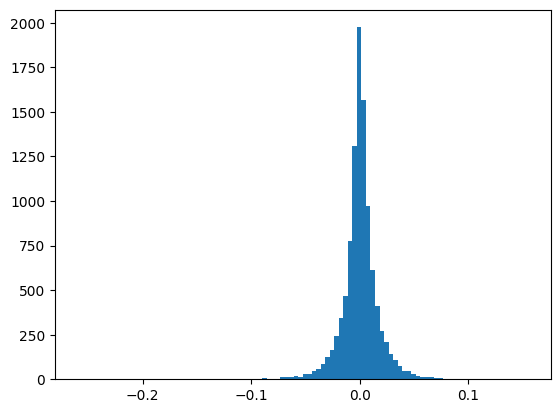

In [18]:
plt.hist(XY_data.ret_close,bins=100)
plt.show(
)

In [19]:
XY_data['y'] = XY_data['ret_close'].shift(-1)
XY_data.columns = ['log_return','rsi14','rsi21','BB30','BB31','MACD','y']
XY_data.tail()

/var/folders/_8/r2326rms4l37yskjs2yv3mv80000gn/T/ipykernel_9260/3419447890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XY_data['y'] = XY_data['ret_close'].shift(-1)


,log_return,rsi14,rsi21,BB30,BB31,MACD,y
open_time,,,,,,,
2024-09-30 11:00:00,0.003062,46.236617,50.622382,0.405491,0.412349,-6.855071,-0.003316
2024-09-30 15:00:00,-0.003316,43.949577,49.088132,0.336007,0.340391,-7.393437,-0.012606
2024-09-30 19:00:00,-0.012606,36.598073,43.828611,0.080785,0.101049,-9.526301,-0.000216
2024-09-30 23:00:00,-0.000216,36.486268,43.744894,0.044491,0.101339,-10.459905,0.002694
2024-10-01 03:00:00,0.002694,38.995063,45.120723,0.074759,0.124045,-10.086594,NaN


# very fix data

XY_data

In [20]:
import seaborn as sns

In [21]:
corr_matrix = round(XY_data.corr(method='spearman'), 3)
normalized_corr_matrix = corr_matrix.div(corr_matrix.sum(axis=1), axis=0)
normalized_corr_matrix

,log_return,rsi14,rsi21,BB30,BB31,MACD,y
log_return,0.454752,0.135516,0.110505,0.135971,0.133697,0.056844,-0.027285
rsi14,0.063337,0.212540,0.207439,0.204251,0.204676,0.110521,-0.002763
rsi21,0.055090,0.221265,0.226706,0.205622,0.206983,0.086148,-0.001814
BB30,0.062802,0.201848,0.190506,0.210040,0.209830,0.127914,-0.002941
BB31,0.061856,0.202609,0.192089,0.210183,0.210393,0.125815,-0.002946
MACD,0.038892,0.161792,0.118233,0.189484,0.186061,0.311139,-0.005600
y,-0.068729,-0.014891,-0.009164,-0.016037,-0.016037,-0.020619,1.145475


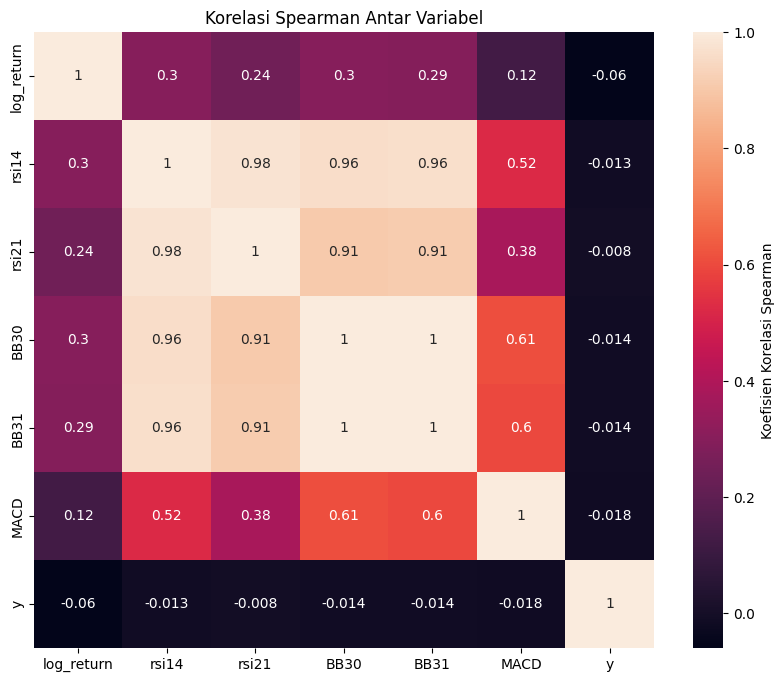

In [22]:
fig = plt.figure(figsize=(10, 8))  # Adjust size if needed
sns.heatmap(round(XY_data.corr(method='spearman'), 3), annot=True,
            cbar_kws={'label': 'Koefisien Korelasi Spearman'})

plt.title('Korelasi Spearman Antar Variabel')

plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')  # Saves as PNG

In [23]:
from scipy.stats import spearmanr

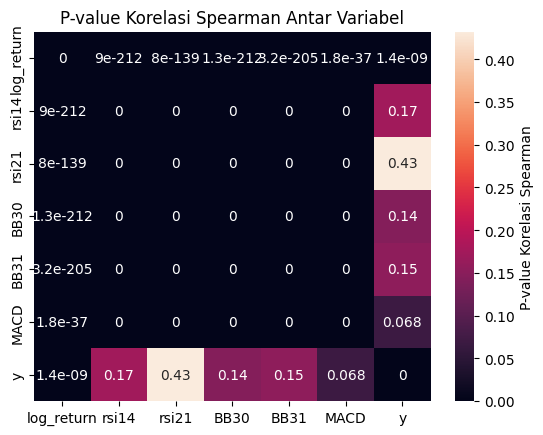

In [24]:
corr_matrix, p_values = spearmanr(XY_data[:-1])
p_value_df = pd.DataFrame(p_values, index=XY_data.columns, columns=XY_data.columns)
sns.heatmap(p_value_df,annot=True,cbar_kws={'label': 'P-value Korelasi Spearman'})
plt.title('P-value Korelasi Spearman Antar Variabel')

plt.savefig("heatmap_pval.png", dpi=300, bbox_inches='tight')  # Saves as PNG

In [25]:
# XY_data.to_csv('data_skripsi.csv')

bawahnya gw ilangin karena gaada y lagi (run out of y) -> log ret udah gada lagi.

In [26]:
XY_data.index = df.open_time.iloc[10387-10338:]

In [27]:
dataX = XY_data.iloc[:-1,:-1]
dataY = XY_data.iloc[5:-1,-1]
dataX.shape

(10337, 6)

In [28]:
dataY.shape

(10332,)

## Setting the Training and Testing Data

In [29]:
X_train = dataX[:7749].values.astype('float32')
y_train = dataY[:7749-6].values.astype('float32')
print(X_train.shape,y_train.shape)

(7749, 6) (7743,)


In [30]:
X_train_modified = []

for i in range(len(X_train)-6):
    X_train_modified.append(X_train[i:i+6])

In [31]:
X_train_tensor = torch.from_numpy(np.array(X_train_modified))
y_train_tensor = torch.from_numpy(y_train).view(-1, 1) 

In [32]:
X_train_tensor.shape

torch.Size([7743, 6, 6])

In [33]:
y_train_tensor.shape

torch.Size([7743, 1])

In [34]:
X_test = dataX[7749:].values.astype('float32')
y_test = dataY[7749:].values.astype('float32')
print(X_test.shape,y_test.shape)

(2588, 6) (2583,)


In [35]:
X_test_modified = []

for i in range(len(X_test)-5):
    X_test_modified.append(X_test[i:i+6])

In [36]:
X_test_tensor = torch.from_numpy(np.array(X_test_modified))
y_test_tensor = torch.from_numpy(y_test).view(-1, 1) 

In [37]:
print(X_test_tensor.shape,y_test_tensor.shape)

torch.Size([2583, 6, 6]) torch.Size([2583, 1])


In [38]:
X_train_check = dataX[:7749]#.values.astype('float32')
y_train_check = dataY[:7749-5]#.values.astype('float32')
X_test_check = dataX[7749:]#.values.astype('float32')
y_test_check = dataY[7749:]#.values.astype('float32')

In [39]:
X_test_check

,log_return,rsi14,rsi21,BB30,BB31,MACD
open_time,,,,,,
2023-07-27 19:00:00,-0.004429,50.069085,48.036260,0.568400,0.550972,3.240137
2023-07-27 23:00:00,-0.004174,45.110592,45.060578,0.425759,0.413731,2.234370
2023-07-28 03:00:00,0.000188,45.372689,45.220869,0.436982,0.434348,1.542062
2023-07-28 07:00:00,0.000935,46.734407,46.042634,0.478325,0.474318,1.167708
2023-07-28 11:00:00,-0.001876,44.346604,44.632536,0.414059,0.405847,0.675838
...,...,...,...,...,...,...
2024-09-30 07:00:00,-0.010468,43.726106,49.227030,0.347818,0.345992,-6.469585
2024-09-30 11:00:00,0.003062,46.236617,50.622382,0.405491,0.412349,-6.855071
2024-09-30 15:00:00,-0.003316,43.949577,49.088132,0.336007,0.340391,-7.393437


# Setting Batch Size

In [40]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [41]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

# Setting Models

### <span style="color:red; font-size:20px; font-weight:bold;"> ⚠️ IMPORTANT: Adjust the Model According to the Assignment! </span>


In [42]:
batch_size = 16  # Adjusting Batch Size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [43]:
epochs = 50 # adjust epoch
hidden_size1 = 64 # adjust layer 1 size
hidden_size2 = 32 # adjust layer 2 size
hidden_size3 = 16 # adjust layer 3 size

In [44]:
class BidirectionalTestModel(nn.Module):
    def __init__(self, input_size=X_train_tensor.shape[-1], 
                 hidden_size_1=hidden_size1, hidden_size_2=hidden_size2, 
                 hidden_size_3=hidden_size3, output_size=1):
        super(BidirectionalTestModel, self).__init__()
        
        # First bidirectional GRU layer
        self.layer1 = nn.LSTM(input_size=input_size, 
                             hidden_size=hidden_size_1,
                             batch_first=True,
                             bidirectional=True)  # Set bidirectional=True
        
        # Second bidirectional GRU layer
        self.layer2 = nn.LSTM(input_size=hidden_size_1 * 2,  # Double the input size
                             hidden_size=hidden_size_2,
                             batch_first=True,
                             bidirectional=True)  # Set bidirectional=True
        
        # Third bidirectional LSTM layer
        self.layer3 = nn.LSTM(input_size=hidden_size_2 * 2,  # Double the input size
                              hidden_size=hidden_size_3,
                              batch_first=True,
                              bidirectional=True)  # Set bidirectional=True
        
        # Final linear layer
        # Input size is doubled because of bidirectional RNN
        self.fc = nn.Linear(hidden_size_3 * 2, output_size)
        
    def forward(self, x):
        # Reshape input if it's not in the right format
        if len(x.shape) == 2:
            x = x.unsqueeze(1)  # Add sequence length dimension
            
        # First bidirectional GRU layer
        out, _ = self.layer1(x)
        
        # Second bidirectional GRU layer
        out, _ = self.layer2(out)
        
        # Third bidirectional LSTM layer
        out, _ = self.layer3(out)
        
        # Take the last output (forward and backward) and pass through final linear layer
        # For bidirectional RNNs, the last hidden state is concatenated as [forward, backward]
        out = self.fc(out[:, -1, :])
        
        return out

In [45]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = BidirectionalTestModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
# list(model_0.parameters())

### Setting Loss Function and Optimizer for NN training

In [46]:
# custom loss
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, y_pred, y_true):
        # Calculate absolute difference
        absolute_error = torch.exp(y_true - y_pred)
        
        # Compute mean absolute error
        loss = torch.mean(absolute_error)
        
        return loss

class LogCoshLoss(nn.Module):
    def __init__(self):
        super(LogCoshLoss, self).__init__()

    def forward(self, y_pred, y_true):
        error = y_true - y_pred
        loss = torch.log(torch.cosh(error))
        return torch.mean(loss)

class CauchyLoss(nn.Module):
    def __init__(self, gamma=1.0):
        super(CauchyLoss, self).__init__()
        self.gamma = gamma

    def forward(self, y_pred, y_true):
        error = (y_true - y_pred) / self.gamma
        loss = torch.log(1 + error ** 2)
        return torch.mean(loss)

# Usage
criterion = CauchyLoss(gamma=1.0)

In [47]:
# Create the loss function
loss_fn =  CauchyLoss(gamma=0.000001)


# Create the optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.000001)

In [48]:
import time

In [49]:
torch.manual_seed(42)
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

epoch_start_time = time.time()  # Start time for total training

for epoch in range(1,epochs+1):
    ### Training
    model_0.train()  # Put model in training mode
    train_loss = 0  # Track total training loss for the epoch
    iteration = 0
    # Iterate over batches in the training DataLoader
    for X_batch, y_batch in train_loader:
        # 1. Forward pass on train data
        y_pred = model_0(X_batch)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y_batch)

        # 3. Zero grad of the optimizer clears the gradients of all optimized tensors.
        optimizer.zero_grad()

        # 4. Loss backwards
        # This function computes the gradients of the loss with respect to the model parameters using backpropagation.
        loss.backward()

        # 5. Progress the optimizer
        
        optimizer.step()

        # Accumulate the training loss for the epoch
        train_loss += loss.item()

    # Calculate average training loss for the epoch
    train_loss /= len(train_loader)

    ### Testing
    model_0.eval()  # Put the model in evaluation mode
    y_preds = []
    test_loss = 0  # Track total testing loss for the epoch

    with torch.inference_mode():
        # Iterate over batches in the test DataLoader
        for X_batch, y_batch in test_loader:
            # 1. Forward pass on test data
            test_pred = model_0(X_batch)

            # 2. Calculate loss on test data
            test_loss += loss_fn(test_pred, y_batch).item()

        # Calculate average testing loss for the epoch
        test_loss /= len(test_loader)
    
    epoch_time = time.time() - epoch_start_time

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch:.6f} | MSE Train Loss: {train_loss:.6f} | MSE Test Loss: {test_loss}")

total_time = time.time() - epoch_start_time
print(f"\nTotal training time: {total_time:.2f} seconds, batch size is {batch_size} and epoch is {epochs}")

Epoch: 10.000000 | MSE Train Loss: 20.318524 | MSE Test Loss: 20.28436979835416
Epoch: 20.000000 | MSE Train Loss: 19.482126 | MSE Test Loss: 19.379942105140216
Epoch: 30.000000 | MSE Train Loss: 19.138149 | MSE Test Loss: 18.993909935892365
Epoch: 40.000000 | MSE Train Loss: 18.936344 | MSE Test Loss: 18.878474600521134
Epoch: 50.000000 | MSE Train Loss: 18.860990 | MSE Test Loss: 18.657279214741273

Total training time: 123.38 seconds, batch size is 16 and epoch is 50


In [50]:
# Make predictions
model_0.eval()
y_train_preds = []

with torch.inference_mode():
    for X_batch, _ in train_loader:
        y_pred = model_0(X_batch)
        y_train_preds.append(y_pred)

# Concatenate all predictions into a single tensor
y_train_preds = torch.cat(y_train_preds)

print("Predictions shape:", y_train_preds.shape)  # Should be (2583, 1)

Predictions shape: torch.Size([7743, 1])


In [51]:
# Make predictions
model_0.eval()
y_preds = []

with torch.inference_mode():
    for X_batch, _ in test_loader:
        y_pred = model_0(X_batch)
        y_preds.append(y_pred)

# Concatenate all predictions into a single tensor
y_preds = torch.cat(y_preds)

print("Predictions shape:", y_preds.shape)  # Should be (2583, 1)

Predictions shape: torch.Size([2583, 1])


In [52]:
prediction_train_np = y_train_preds.numpy()
prediction_np = y_preds.numpy()

In [53]:
# model train vs test
y_train_np = y_train.reshape(prediction_train_np.shape[0],1)
y_test_np = y_test.reshape(prediction_np.shape[0],1)

In [54]:
epoch_list = list(range(0,epochs,10))

In [55]:
import matplotlib.pyplot as plt

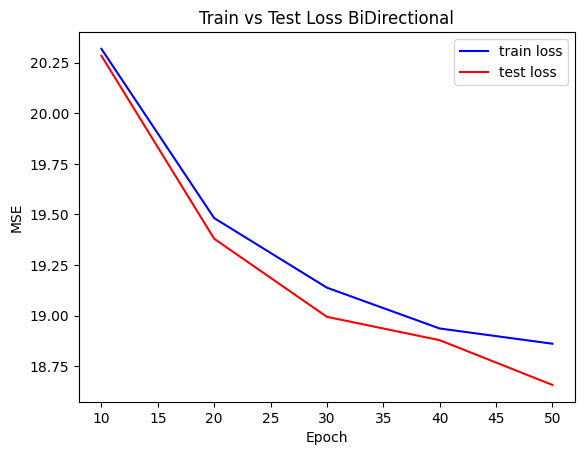

In [56]:
epoch_list = list(range(10,1+epochs,10))

plt.plot(epoch_list,train_loss_values,label='train loss',color='blue')
plt.plot(epoch_list,test_loss_values,label='test loss',color = 'red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Train vs Test Loss BiDirectional')

plt.legend()

plt.show()

# Combining return and data

## training data

In [57]:
close_train =  df.loc[X_train_check.iloc[6:].index].close.values

In [58]:
close_train_t1 = df.loc[X_train_check.iloc[5:-1].index].close.values
close_train_prediction = np.log(close_train_t1)+prediction_train_np.reshape(7743)
predicted_price_train = np.exp(close_train_prediction)

In [59]:
predicted_price_train.shape

(7743,)

In [60]:
close_real = df.loc[df.open_time>='2023-7-28 19:00'].close.values # real data
print(close_real)
close_real.shape

[1874.74 1873.4  1873.39 ... 2595.05 2594.49 2601.49]


(2583,)

In [61]:
# first y_hat that we get is to predicting return 
close_pred = np.log(df.loc[df.open_time>='2023-7-28 15:00'].close.values[:-1])
close_pred_logged = close_pred.reshape(close_pred.shape[0],1) + prediction_np

In [62]:
close_hat = np.exp(close_pred_logged)
close_hat.shape

(2583, 1)

In [63]:
prediction_np.shape

(2583, 1)

In [64]:
y_test.shape[0]

2583

In [65]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

# return error

## train data return error

In [66]:
mse(prediction_train_np,y_train)

0.000869830371811986

In [67]:
rmse(prediction_train_np,y_train)

0.02949288673698902

In [68]:
mae(prediction_train_np,y_train)

0.021074336022138596

In [69]:
mape(prediction_train_np,y_train)

4.657577991485596

## train data price error

In [70]:
mse(predicted_price_train,close_train)

5757.86131920863

In [71]:
rmse(predicted_price_train,close_train)

75.88057273906563

In [72]:
mae(predicted_price_train,close_train)

43.43531614564359

In [73]:
mape(predicted_price_train,close_train)

0.020881646618522914

## test data return error

In [74]:
mse(prediction_np,y_test)

0.0006458624266088009

In [75]:
rmse(prediction_np,y_test)

0.02541382424533367

In [76]:
mae(prediction_np,y_test)

0.01865939237177372

In [77]:
mape(prediction_np,y_test)

2.445185422897339

## test data price error

In [78]:
mse(close_real,close_hat)

5876.424186200608

In [79]:
rmse(close_real,close_hat)

76.65783838721653

In [80]:
mae(close_real,close_hat)

52.509155126680405

In [81]:
mape(close_real,close_hat)

0.018849640885241294

## Confusion Matrix

In [82]:
pred_sign = [1 if i[0] > 0 else 0 for i in prediction_np]
real_sign = [1 if i > 0 else 0 for i in y_test]

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [84]:
confusion_matrix(real_sign,pred_sign)

array([[646, 651],
       [610, 676]])

In [85]:
accuracy_score(real_sign,pred_sign)

0.5118079752226093

# Plotting

In [86]:
train_date = X_train_check.iloc[6:].index
test_date = XY_data.index[XY_data.index>='2023-7-28 19:00']

In [87]:
combined_date = np.concatenate((train_date,test_date))
combined_return_pred = np.concatenate((prediction_train_np,prediction_np))
combined_return_real = np.concatenate((y_train,y_test))

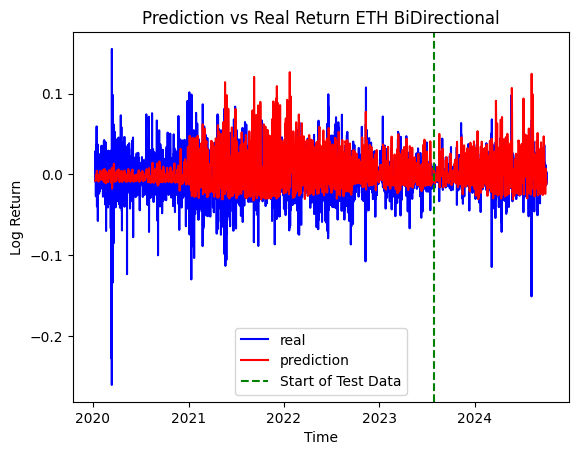

In [88]:
plt.plot(combined_date,combined_return_real, label = 'real',color='blue')

plt.plot(combined_date,combined_return_pred,label = 'prediction',color='red')
plt.axvline(test_date[0],color='green', linestyle='--', label='Start of Test Data')

plt.xlabel(
    'Time'
)
plt.ylabel('Log Return')
# plt.plot(y_test, label = 'real')
plt.title("Prediction vs Real Return ETH BiDirectional")
plt.legend()
plt.show()

In [89]:
combined_price_prediction = np.concatenate((predicted_price_train,close_hat.reshape(2583)))
combined_real_price = np.concatenate((close_train,close_real))

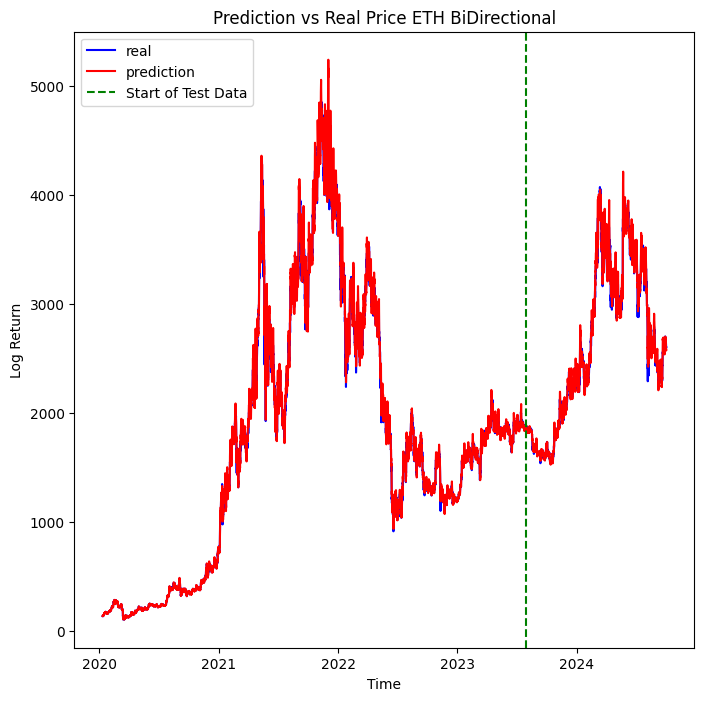

In [90]:
plt.figure(figsize=(8,8))
plt.plot(combined_date,combined_real_price, label = 'real',color='blue')

plt.plot(combined_date,combined_price_prediction,label = 'prediction',color='red')
plt.axvline(test_date[0],color='green', linestyle='--', label='Start of Test Data')

plt.xlabel(
    'Time'
)
plt.ylabel('Log Return')
# plt.plot(y_test, label = 'real')
plt.title("Prediction vs Real Price ETH BiDirectional")
plt.legend()
plt.show()